# Laboratorio 6
CC3094 Security Data Science  
Sección 10  
Erick Stiv Junior Guerra Muñoz - 21781  
  
Repositorio de GitHub: https://github.com/erickguerra22/SDS_Lab6.git

In [131]:
# Imports necesarios
from scapy.all import sniff, rdpcap, Ether, IP, TCP, UDP, ICMP
import pandas as pd
import matplotlib.pyplot as plt
from scapy.packet import Raw

### Preámbulo

a. Capture 25 paquetes de su red doméstica (no de la red de la UVG) y asígnelos a una variable.

In [132]:
paquetes = sniff(count=25)

b.	Imprima el tipo de variable, la longitud y el contenido de la variable.

In [133]:
print("Tipo:", type(paquetes))
print("Longitud:", len(paquetes))
print("Contenido:")
paquetes.show()

Tipo: <class 'scapy.plist.PacketList'>
Longitud: 25
Contenido:
0000 Ether / IP / UDP 10.100.0.81:2008 > 10.100.31.255:2008 / Raw
0001 Ether / IP / UDP / mDNS Ans b'IPad-de-Fabio.local.'
0002 Ether / IP / UDP 10.100.0.81:2007 > 10.100.31.255:2007 / Raw
0003 Ether / IP / UDP / mDNS Qry b'iPad de Dayana._companion-link._tcp.local.'
0004 Ether / Dot1Q / IP / UDP 10.100.5.89:58817 > 239.255.255.250:ssdp / Raw
0005 Ether / IP / UDP / mDNS Qry b'_homekit._tcp.local.'
0006 Ether / IP / UDP / mDNS Ans b'MacBook Air de Mynor._companion-link._tcp.local.'
0007 Ether / IP / UDP / mDNS Ans b'iPad de Jimena (2)._companion-link._tcp.local.'
0008 Ether / Dot1Q / IP / UDP 10.100.3.174:58870 > 239.255.255.250:ssdp / Raw
0009 Ether / IP / UDP 10.100.5.25:2343 > 255.255.255.255:2343 / Raw
0010 Ether / IP / UDP / mDNS Qry b'MacBook Air de Nicolle._companion-link._tcp.local.'
0011 Ether / Dot1Q / IP / UDP 10.100.5.27:62219 > 239.255.255.250:ssdp / Raw
0012 Ether / IP / UDP / mDNS Ans [b'rpMac=0', b'rpHN=904b

c.	Imprima el tipo de dato del primer paquete capturado.

In [134]:
print("Tipo de primer paquete: ",type(paquetes[0]))

Tipo de primer paquete:  <class 'scapy.layers.l2.Ether'>


d.	Imprima el contenido de 5 paquetes.

In [135]:
for i in range(5):
    print(f"Paquete {i+1}: \n")
    print(paquetes[i].show())
    print(f"\n{"-"*20}\n")

Paquete 1: 

###[ Ethernet ]###
  dst       = ff:ff:ff:ff:ff:ff
  src       = 90:78:41:af:0c:80
  type      = IPv4
###[ IP ]###
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 48
     id        = 62163
     flags     = 
     frag      = 0
     ttl       = 128
     proto     = udp
     chksum    = 0x12d2
     src       = 10.100.0.81
     dst       = 10.100.31.255
     \options   \
###[ UDP ]###
        sport     = 2008
        dport     = 2008
        len       = 28
        chksum    = 0x1132
###[ Raw ]###
           load      = b'BC 15LAPTOP-CLSSJEKJ'

None

--------------------

Paquete 2: 

###[ Ethernet ]###
  dst       = 01:00:5e:00:00:fb
  src       = 62:9a:0a:24:4f:0e
  type      = IPv4
###[ IP ]###
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 246
     id        = 13020
     flags     = 
     frag      = 0
     ttl       = 255
     proto     = udp
     chksum    = 0x8ccb
     src       = 10.100.15.240
     dst       = 224

### Análisis estadístico

1. Descargue e archivo analisis_paquetes.pcap y asignelo a una variable.

In [136]:
packages = rdpcap('./analisis_paquetes.pcap')

2. Convierta la variable a un DataFrame.

In [137]:
df_pkgs = []

for pkt in packages:
    fila = {}

    if Ether in pkt:
        eth = pkt[Ether]
        fila["eth_src"] = eth.src
        fila["eth_dst"] = eth.dst
        fila["eth_type"] = eth.type

    if IP in pkt:
        ip = pkt[IP]
        fila["ip_version"] = ip.version
        fila["ip_ihl"] = ip.ihl
        fila["ip_tos"] = ip.tos
        fila["ip_len"] = ip.len
        fila["ip_id"] = ip.id
        fila["ip_flags"] = ip.flags
        fila["ip_frag"] = ip.frag
        fila["ip_ttl"] = ip.ttl
        fila["ip_proto"] = ip.proto
        fila["ip_chksum"] = ip.chksum
        fila["ip_src"] = ip.src
        fila["ip_dst"] = ip.dst

    if TCP in pkt:
        tcp = pkt[TCP]
        fila["tcp_sport"] = tcp.sport
        fila["tcp_dport"] = tcp.dport
        fila["tcp_seq"] = tcp.seq
        fila["tcp_ack"] = tcp.ack
        fila["tcp_dataofs"] = tcp.dataofs
        fila["tcp_reserved"] = tcp.reserved
        fila["tcp_flags"] = tcp.flags
        fila["tcp_window"] = tcp.window
        fila["tcp_chksum"] = tcp.chksum
        fila["tcp_urgptr"] = tcp.urgptr

    if UDP in pkt:
        udp = pkt[UDP]
        fila["udp_sport"] = udp.sport
        fila["udp_dport"] = udp.dport
        fila["udp_len"] = udp.len
        fila["udp_chksum"] = udp.chksum

    if ICMP in pkt:
        icmp = pkt[ICMP]
        fila["icmp_type"] = icmp.type
        fila["icmp_code"] = icmp.code
        fila["icmp_chksum"] = icmp.chksum
        fila["icmp_id"] = getattr(icmp, "id", None)
        fila["icmp_seq"] = getattr(icmp, "seq", None)

    fila["timestamp"] = pkt.time
    fila["length"] = len(pkt)
    fila["summary"] = pkt.summary()

    if Raw in pkt:
        payload_bytes = bytes(pkt[Raw])
        fila["payload"] = len(payload_bytes)
        fila["payload_raw"] = payload_bytes.hex()
    else:
        fila["payload"] = 0
        fila["payload_raw"] = None

    df_pkgs.append(fila)

df_pkgs = pd.DataFrame(df_pkgs)
df_pkgs.to_csv("paquetes_con_payload.csv", index=False)


3. Muestre el contenido de las primeras 5 filas del dataset

In [138]:
df_pkgs.head(5)

,eth_src,eth_dst,eth_type,ip_version,ip_ihl,ip_tos,ip_len,ip_id,ip_flags,ip_frag,...,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,timestamp,length,summary,payload,payload_raw
0,88:e9:fe:6a:92:52,80:37:73:96:9b:db,2048,4,5,0,961,1,,0,...,84.54.22.33,53,53,941,62990,1532199330.917674,975,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,905,efbfbd504e470d0a1a0a0000000d494844520000016200...
1,80:37:73:96:9b:db,88:e9:fe:6a:92:52,2048,4,5,32,84,58919,,0,...,10.1.10.53,53,53,64,65061,1532199330.950107,98,Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807:...,0,None
2,88:e9:fe:6a:92:52,80:37:73:96:9b:db,2048,4,5,0,975,1,,0,...,84.54.22.33,53,53,955,36378,1532199331.937777,989,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,919,3aefbfbd6c653ac7a9efbfbdefbfbdefbfbd0cefbfbdef...
3,80:37:73:96:9b:db,88:e9:fe:6a:92:52,2048,4,5,32,84,59493,,0,...,10.1.10.53,53,53,64,65063,1532199331.956635,98,Ether / IP / UDP / DNS Ans 2607:f8b0:4005:807:...,0,None
4,88:e9:fe:6a:92:52,80:37:73:96:9b:db,2048,4,5,0,1012,1,,0,...,84.54.22.33,53,53,992,63846,1532199332.960504,1026,Ether / IP / UDP / DNS Qry b'google.com.' / Raw,956,efbfbdefbfbd5e6eefbfbd2727efbfbdefbfbdefbfbd24...


4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port

In [139]:
tcp_sport = df_pkgs["tcp_sport"] if "tcp_sport" in df_pkgs else pd.Series([None]*len(df_pkgs)).astype("Int64")
udp_sport = df_pkgs["udp_sport"] if "udp_sport" in df_pkgs else pd.Series([None]*len(df_pkgs)).astype("Int64")

tcp_dport = df_pkgs["tcp_dport"] if "tcp_dport" in df_pkgs else pd.Series([None]*len(df_pkgs)).astype("Int64")
udp_dport = df_pkgs["udp_dport"] if "udp_dport" in df_pkgs else pd.Series([None]*len(df_pkgs)).astype("Int64")

df_pkgs["src_port"] = tcp_sport.fillna(udp_sport)
df_pkgs["dst_port"] = tcp_dport.fillna(udp_dport)

df_vis = df_pkgs[["ip_src", "ip_dst", "src_port", "dst_port"]]
df_vis.head()


,ip_src,ip_dst,src_port,dst_port
0,10.1.10.53,84.54.22.33,53,53
1,84.54.22.33,10.1.10.53,53,53
2,10.1.10.53,84.54.22.33,53,53
3,84.54.22.33,10.1.10.53,53,53
4,10.1.10.53,84.54.22.33,53,53


5. Estadísticas

5. a. Mostrar todas las IP de origen

In [140]:
originsIp = df_pkgs["ip_src"].unique()
print(originsIp)

['10.1.10.53' '84.54.22.33' '75.75.75.75']


5. b. Muestre todas las IP destino

In [141]:
destinationIp = df_pkgs["ip_dst"].unique()
print(destinationIp)

['84.54.22.33' '10.1.10.53' '75.75.75.75']


5. c. ¿Cuál es la IP origen más frecuente?

In [142]:
frequentOriginIp = df_pkgs["ip_src"].mode()[0]
print(f"La IP origen más frecuente es: {frequentOriginIp}")

La IP origen más frecuente es: 10.1.10.53


  5. c.i. ¿A qué IP destino se comunica con más frecuencia?

In [143]:
frequentDestinationIp = df_pkgs[df_pkgs["ip_src"] == frequentOriginIp]["ip_dst"].mode()[0]
print(f"La IP destino a la que más se comunica la IP origen {frequentOriginIp} es: {frequentDestinationIp}")

La IP destino a la que más se comunica la IP origen 10.1.10.53 es: 84.54.22.33


5. c.ii. ¿A qué puerto destino se comunica más? ¿Cuál es el propósito de este puerto?

In [144]:
frequentDestinationPort = df_pkgs[df_pkgs["ip_src"] == frequentDestinationIp]["dst_port"].mode()[0]
print(f"El puerto destino más frecuente para la IP origen {frequentOriginIp} es: {frequentDestinationPort}")

El puerto destino más frecuente para la IP origen 10.1.10.53 es: 53


**R:** El propósito del puerto 53 es DNS.

5. c.iii. ¿Desde que puertos origen se comunica?

In [145]:
puertos_origen = df_pkgs[df_pkgs["ip_src"] == frequentOriginIp]["src_port"].value_counts().head(100)
print("Los puertos origen son:")
print(puertos_origen)


Los puertos origen son:
src_port
53       29
15812     1
23903     1
Name: count, dtype: Int64


6. Gráficas

6. a. Genere una gráfica de barras 2D horizontales, en el eje Y las IPs origen, y en el eje X la
suma de los payloads (bytes) enviados desde dichas direcciones.

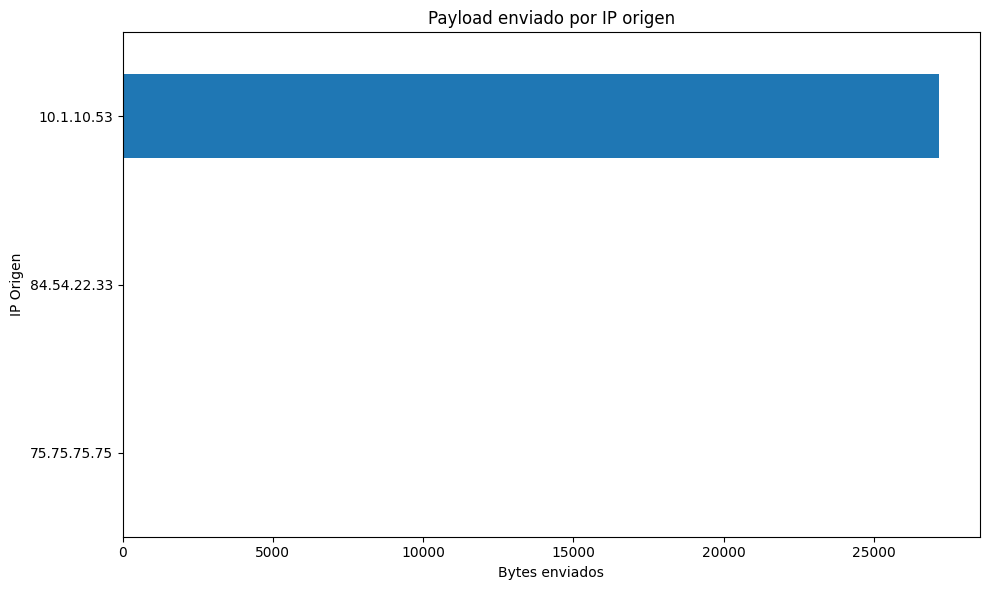

In [146]:
df_src_payload = df_pkgs.groupby("ip_src")["payload"].sum().sort_values()
df_src_payload.plot(kind="barh", figsize=(10, 6), title="Payload enviado por IP origen")
plt.xlabel("Bytes enviados")
plt.ylabel("IP Origen")
plt.tight_layout()
plt.show()

6. b. Genere una gráfica de barras 2D horizontales, en el eje Y las IP destino, y en el eje X
la suma de los payloads (bytes) recibidos en dichas direcciones.

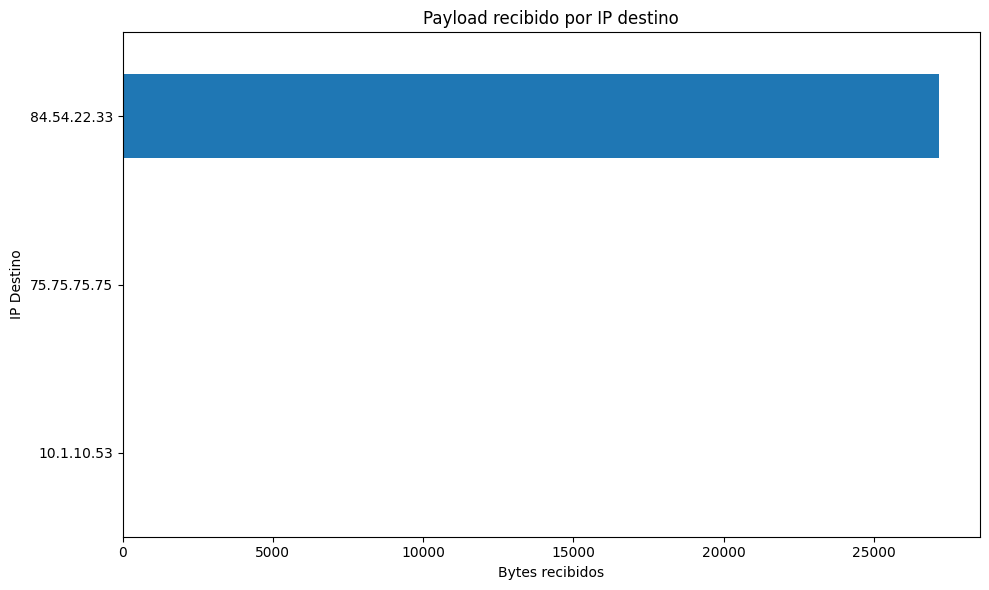

In [147]:
df_dst_payload = df_pkgs.groupby("ip_dst")["payload"].sum().sort_values()
df_dst_payload.plot(kind="barh", figsize=(10, 6), title="Payload recibido por IP destino")
plt.xlabel("Bytes recibidos")
plt.ylabel("IP Destino")
plt.tight_layout()
plt.show()

6. c. Genere una gráfica de barras 2D horizontales, en el eje Y los puertos origen, y en el
eje X la suma de los payloads (bytes) enviados de dichos puertos.

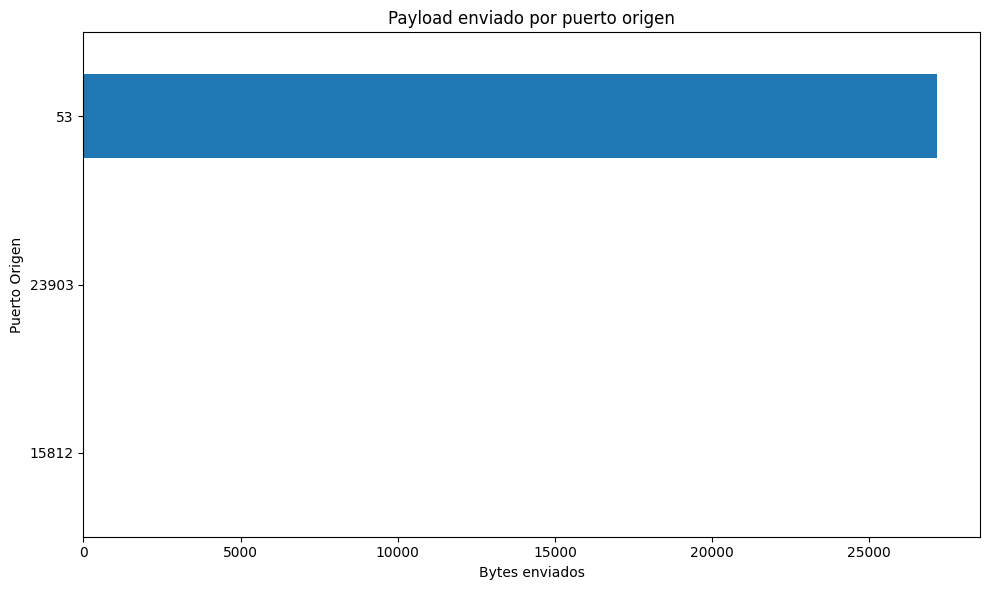

In [148]:
df_srcport_payload = df_pkgs.groupby("src_port")["payload"].sum().sort_values()
df_srcport_payload.plot(kind="barh", figsize=(10, 6), title="Payload enviado por puerto origen")
plt.xlabel("Bytes enviados")
plt.ylabel("Puerto Origen")
plt.tight_layout()
plt.show()

6. d. Genere una gráfica 2D de barras horizontales, en el eje Y los puertos destino, y en el
eje X la suma de los payloads (bytes) recibidos en dichos puertos.

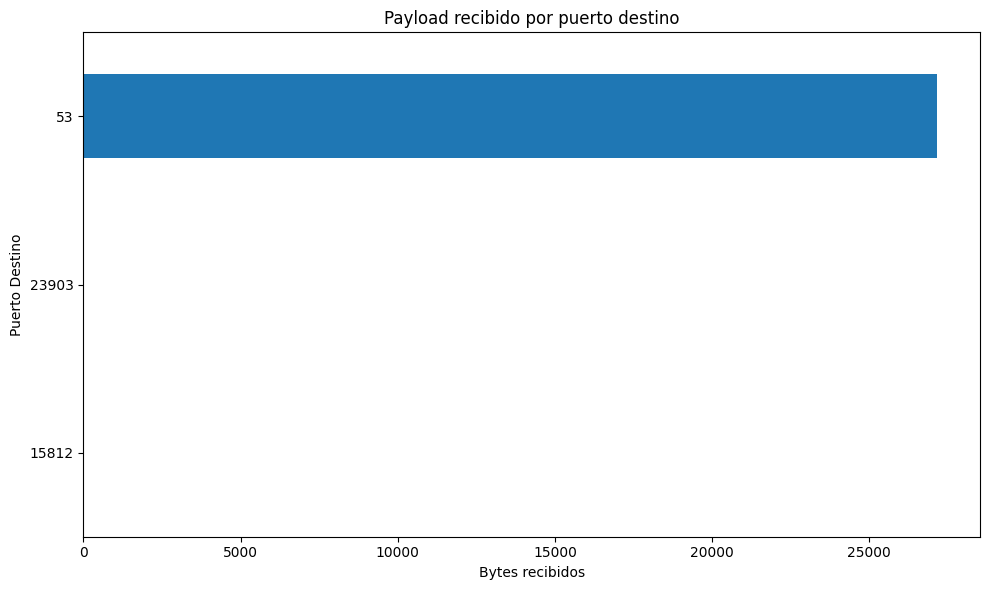

In [149]:
df_dstport_payload = df_pkgs.groupby("dst_port")["payload"].sum().sort_values()
df_dstport_payload.plot(kind="barh", figsize=(10, 6), title="Payload recibido por puerto destino")
plt.xlabel("Bytes recibidos")
plt.ylabel("Puerto Destino")
plt.tight_layout()
plt.show()

6. e. Genere una gráfica de barras 2D verticales, en el eje Y la suma de los payload, en el
eje X el tiempo, para la IP origen más frecuente.

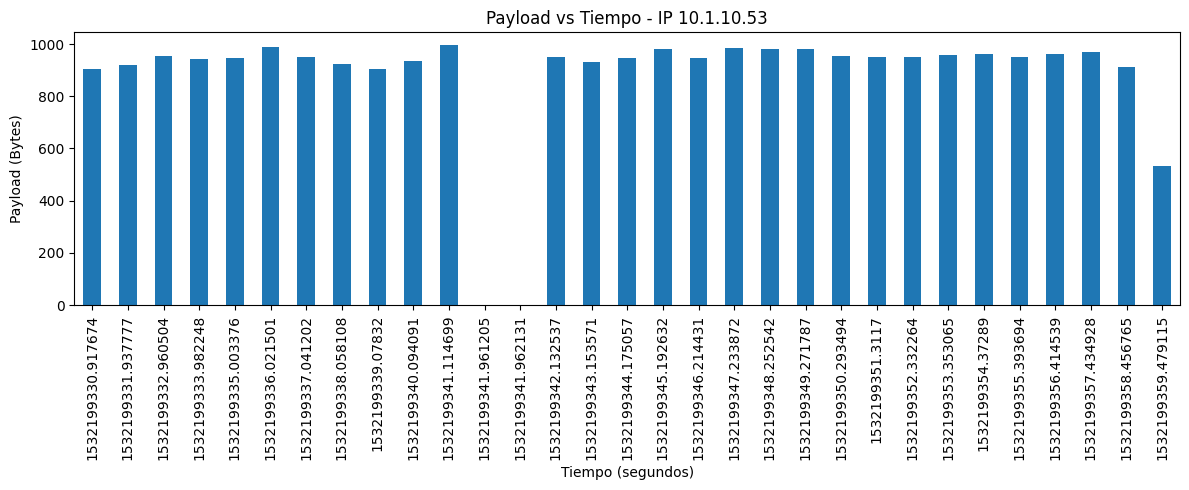

In [152]:
df_ip_frec = df_pkgs[df_pkgs["ip_src"] == frequentOriginIp]
df_time_payload = df_ip_frec.groupby("timestamp")["payload"].sum()

df_time_payload.plot(kind="bar", figsize=(12, 5), title=f"Payload vs Tiempo - IP {frequentOriginIp}")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Payload (Bytes)")
plt.tight_layout()
plt.show()

6. f. Utilizando la información de las estadísticas y la información del comportamiento del
tráfico que las gráficas muestran, describa que es lo que está sucediendo. ¿Es común
el comportamiento?

**R:** Este tráfico de red muestra un comportamiento inusual. La IP 10.1.10.53, demuestra estar mandando constantemente paquetes de entre 800 y 1000 bytes por espacio de tiempo (sumando un total de 26,000 bytes) hacia la IP 84.54.22.33, y todo esto ocurre exclusivamente por el puerto 53, que es el que normalmente se usa para DNS, lo cual no es habitual en el comportamiento de DNS. Entre las señales de alarma, podemos identificar
- Solo hay comunicación en una dirección
- Los envíos son extremadamente regulares y constantes
- Están usando un puerto que casi siempre está permitido en los firewalls para pasar desapercibidos. 
En conclusión, lo que se observa podría ser un sistema comprometido que está enviando información o recibiendo órdenes de un servidor externo controlado por atacantes, aprovechándose del protocolo DNS para evitar que lo detecten los sistemas de seguridad.

7. Investigación del payload

7. a. Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen
más frecuente.

In [153]:
df_ip_frecuente = df_pkgs[df_pkgs["ip_src"] == frequentOriginIp]

7. b. Cree un nuevo DF que utilice el DF anterior con las columnas src, dst y payload y
agrúpelas por dst y la suma del payload

In [154]:
df_payload = df_ip_frecuente[["ip_src", "ip_dst", "payload"]]
df_grouped = df_payload.groupby("ip_dst").agg({"payload": "sum"}).sort_values("payload", ascending=False)


7. c. Obtenga la IP destino que más ha intercambiado bytes con la IP más frecuente. Esta
IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.

In [155]:
ip_destino_sospechosa = df_grouped.idxmax()["payload"]

7. d. Cree un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa.

In [156]:
df_conversacion = df_ip_frecuente[df_ip_frecuente["ip_dst"] == ip_destino_sospechosa]

7. e. Obtenga los payloads del DF del inciso anterior, y añada cada uno en un array.

In [157]:
payloads = df_conversacion["payload"].to_numpy()

7. f. Muestre el contenido del array.

In [159]:
payloads

array([905, 919, 956, 942, 947, 989, 952, 923, 903, 936, 995, 950, 930,
       948, 981, 948, 983, 981, 979, 954, 950, 950, 957, 963, 949, 961,
       971, 913, 532], dtype=int64)

7. g. Observe los primeros bytes del contenido, ¿encuentra algún tipo de dato que no haga
sentido que se envíe al puerto destino? Describa lo que encontró.

In [162]:
primeros_bytes = [bytes(payload)[:10] for payload in payloads]
primeros_bytes


[b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 b'\x00\x00\x00\x00\x00\x00\x00\x0

**R:** Al revisar los primeros bytes de los payloads, se observa que la mayoría de los paquetes contienen valores nulos, lo que puede sugerir que los datos enviados al puerto destino no contienen información significativa o están vacíos. Este comportamiento es inusual, ya que en una comunicación de red habitual, los valores nulos no deberían ser predominantes. Ya que todos los paquetes están siendo enviados a un puerto específico (53: DNS), este tipo de datos vacíos podría indicar una posible forma de ocultar datos a través de tráfico aparentemente inofensivo. Esta situación evidencia nuevamente lo anómalo del comportamiento de la red.